## Time series Analysis - Stock market Forecasting using ARIMA Model

#### Imported Numpy, Pandas and Matplotlib Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

<b> Ignoring Warnings

In [2]:
import warnings #Ignored Warnings
warnings.filterwarnings('ignore')

In [3]:
# Installing Pandas_datareader
!pip install pandas_datareader

<b> Importing Pandas DataReader to read live stock data 

In [4]:
import pandas_datareader  
import datetime
import pandas_datareader.data as stock

<b> Populating stock data for the below intervals for three stocks Amazon, Google and Microsoft

In [5]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 11, 17)
amazon = stock.DataReader("AMZN", 'yahoo', start, end)
google = stock.DataReader("GOOGL", 'yahoo', start, end)
microsoft = stock.DataReader("MSFT",'yahoo',start, end)

In [6]:
amazon.sample()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-02-05,378.799988,365.899994,366.0,373.890015,7247600,373.890015


In [7]:
google.sample()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-15,1333.540039,1311.890015,1315.050049,1333.540039,1964300,1333.540039


In [8]:
microsoft.sample()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-18,75.970001,75.040001,75.230003,75.160004,23307000.0,71.085495


<b> Displaying the Opening Price of the Stock

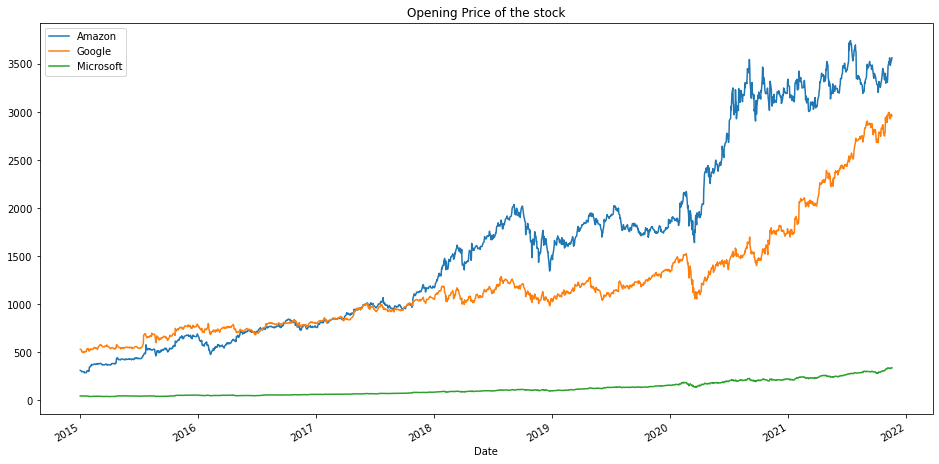

In [9]:
amazon['Open'].plot(label='Amazon',figsize=(16,8),title='Opening Price of the stock')
google['Open'].plot(label='Google')
microsoft['Open'].plot(label='Microsoft')
plt.legend()

<b> Amount of Volume Traded for the stock data 

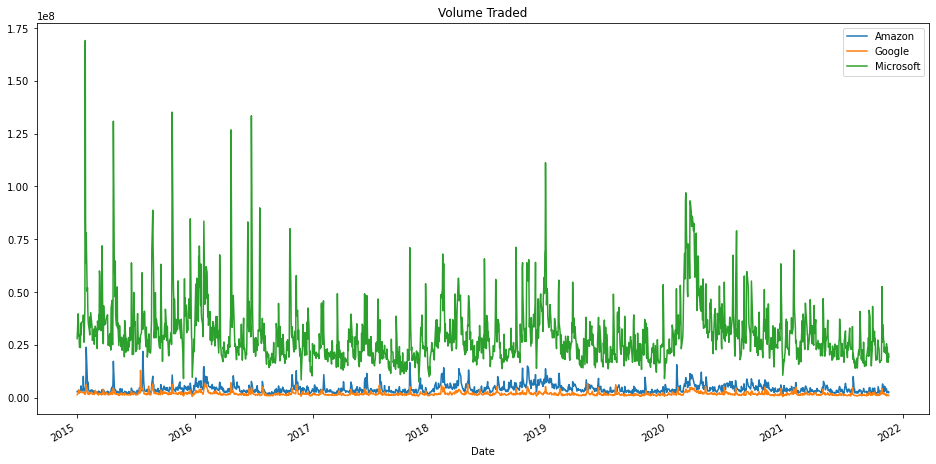

In [10]:
amazon['Volume'].plot(label='Amazon',figsize=(16,8),title='Volume Traded')
google['Volume'].plot(label='Google')
microsoft['Volume'].plot(label='Microsoft')
plt.legend()

<b> MARKET CAPITALIZATION ESTIMATE

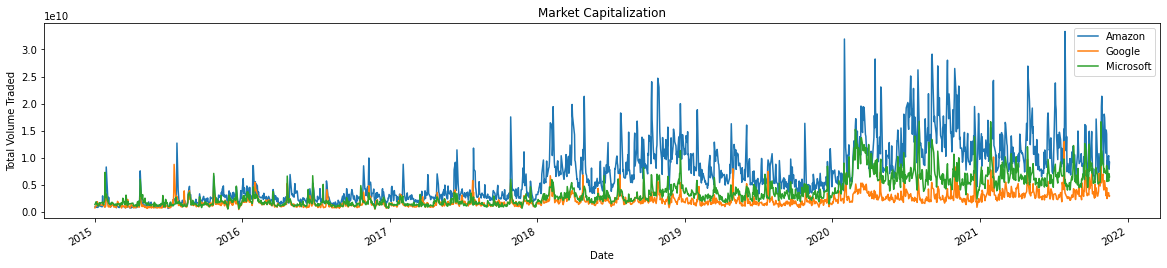

In [11]:
amazon['Total Traded'] = amazon['Open']*amazon['Volume']
google['Total Traded'] = google['Open']*google['Volume']
microsoft['Total Traded'] = microsoft['Open']*microsoft['Volume']
amazon['Total Traded'].plot(label='Amazon',figsize=(20,4),title='Market Capitalization')
google['Total Traded'].plot(label='Google')
microsoft['Total Traded'].plot(label='Microsoft')
plt.legend()
plt.ylabel('Total Volume Traded');

<b> Competitor Analysis using Scatter Plot

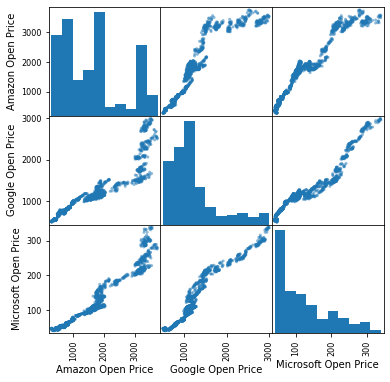

In [12]:
from pandas.plotting import scatter_matrix
tech_compare = pd.concat([amazon['Open'],google['Open'],microsoft['Open']],axis=1)
tech_compare.columns = ['Amazon Open Price','Google Open Price','Microsoft Open Price']
scatter_matrix(tech_compare,figsize=(6,6));

# Statistical Analysis of the Financial Data

<b> Calculating daily returns of each Company

In [13]:
amazon['Returns'] = (amazon['Adj Close'] / amazon['Adj Close'].shift(1) ) - 1
amazon.sample()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2019-08-14,1795.650024,1757.219971,1793.01001,1762.959961,4893600,1762.959961,8.774274e+09,-0.033645


In [14]:
google['Returns']= (google['Adj Close']/ google['Adj Close'].shift(1)) - 1
google.sample()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2015-07-06,548.580017,542.099976,542.25,545.619995,1280700,545.619995,694459575.0,-0.003143


In [15]:
microsoft['Returns']=(microsoft['Adj Close']/microsoft['Adj Close'].shift(1)) - 1
microsoft.sample()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2018-01-17,90.279999,88.75,89.080002,90.139999,25621200.0,85.681572,2.282337e+09,0.02026


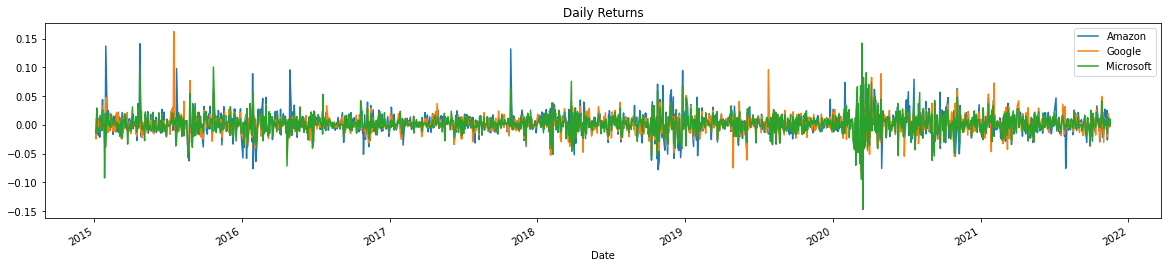

In [16]:
amazon['Returns'].plot(label='Amazon',figsize=(20,4),title='Daily Returns')
google['Returns'].plot(label='Google')
microsoft['Returns'].plot(label='Microsoft')
plt.legend()

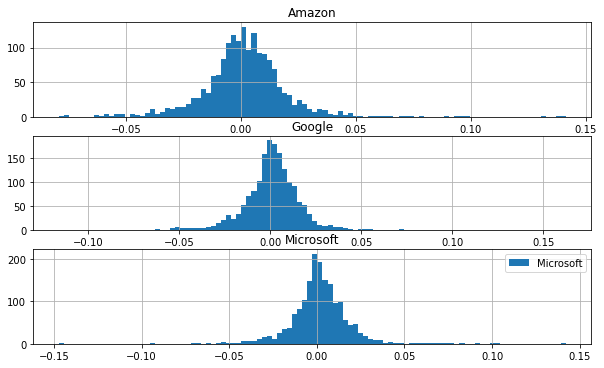

In [17]:
plt.subplot(4,1,1)
amazon['Returns'].hist(bins=100,figsize=(10,8))
plt.title('Amazon')
plt.subplot(4,1,2)
google['Returns'].hist(bins=100,label='Google',figsize= (10,8))
plt.title('Google')
plt.subplot(4,1,3)
microsoft['Returns'].hist(bins=100,label='Microsoft',figsize= (10,8))
plt.title('Microsoft')
plt.legend();

<b> Comparing Stock volatility

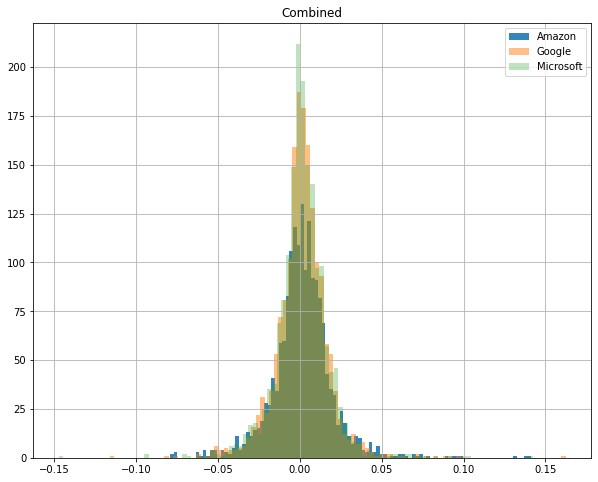

In [18]:
amazon['Returns'].hist(bins=100,label= 'Amazon',figsize=(10,8),alpha= 0.9)
google['Returns'].hist(bins=100,label='Google',figsize= (10,8),alpha= 0.5)
microsoft['Returns'].hist(bins=100,label='Microsoft',figsize=(10,8),alpha = 0.3)
plt.title('Combined')
plt.legend();

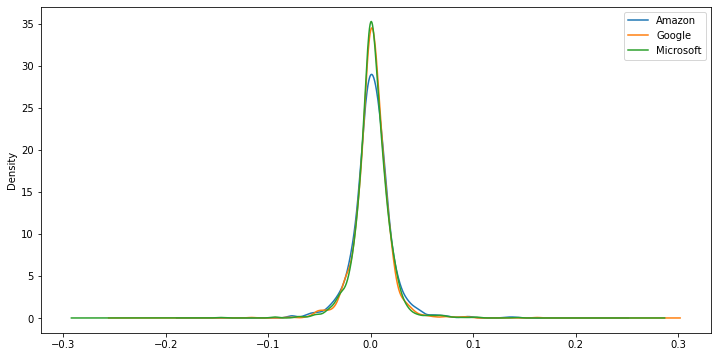

In [19]:
amazon['Returns'].plot(kind='kde',label='Amazon',figsize=(12,6))
google['Returns'].plot(kind='kde',label='Google')
microsoft['Returns'].plot(kind='kde',label='Microsoft')
plt.legend();

<b> Cumulative Returns Calculation

In [20]:
amazon['Cumulative Returns'] = (1 + amazon['Returns']).cumprod()
google['Cumulative Returns'] = (1 + google['Returns']).cumprod()
microsoft['Cumulative Returns'] = (1 + microsoft['Returns']).cumprod()

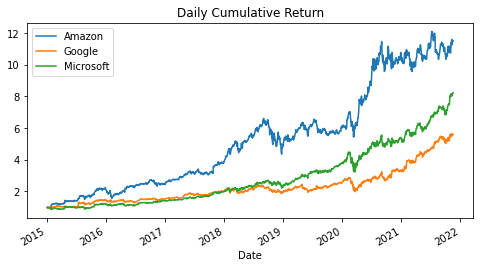

In [21]:
amazon['Cumulative Returns'].plot(label='Amazon',figsize=(8,4),title='Daily Cumulative Return')
google['Cumulative Returns'].plot(label='Google')
microsoft['Cumulative Returns'].plot(label='Microsoft')
plt.legend();

In [22]:
amazon.sample()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns,Cumulative Returns
Date,,,,,,,,,
2017-06-12,975.950012,945.0,967.0,964.909973,9447200,964.909973,9.135442e+09,-0.013697,3.127544


In [23]:
google.sample()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns,Cumulative Returns
Date,,,,,,,,,
2018-12-12,1091.72998,1071.969971,1077.079956,1073.72998,1448000,1073.72998,1.559612e+09,0.011378,2.027627


In [24]:
microsoft.sample()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns,Cumulative Returns
Date,,,,,,,,,
2020-09-25,209.039993,202.539993,203.550003,207.820007,29437300.0,205.554337,5.991963e+09,0.022787,4.989929


<B> TIME SERIES ANALYSIS

In [25]:
amazon.to_csv('Amazon_Stock.csv') #Converted the above derived data to csv format
google.to_csv('Google_Stock.csv')
microsoft.to_csv('Microsoft_Stock.csv')

In [26]:
df = pd.read_csv('Amazon_Stock.csv')  #Stored the Stock Data into a Data frame

In [27]:
df.head()                           #Top 5 entries 

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns,Cumulative Returns
0,2015-01-02,314.750000,306.959991,312.579987,308.519989,2783200,308.519989,8.699726e+08,NaN,NaN
1,2015-01-05,308.380005,300.850006,307.010010,302.190002,2774200,302.190002,8.517072e+08,-0.020517,0.979483
2,2015-01-06,303.000000,292.380005,302.239990,295.290009,3519000,295.290009,1.063583e+09,-0.022833,0.957118
3,2015-01-07,301.279999,295.329987,297.500000,298.420013,2640300,298.420013,7.854892e+08,0.010600,0.967263
4,2015-01-08,303.140015,296.109985,300.320007,300.459991,3088400,300.459991,9.275083e+08,0.006836,0.973875


In [28]:
df.tail()                               #Last 5 entries

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns,Cumulative Returns
1728,2021-11-11,3543.239990,3467.469971,3513.000000,3472.500000,2264400,3472.500000,7.954837e+09,-0.002743,11.255349
1729,2021-11-12,3540.729980,3447.050049,3485.000000,3525.149902,2688500,3525.149902,9.369422e+09,0.015162,11.426002
1730,2021-11-15,3593.879883,3525.810059,3537.000000,3545.679932,2929700,3545.679932,1.036235e+10,0.005824,11.492545
1731,2021-11-16,3576.500000,3525.149902,3539.000000,3540.699951,2217100,3540.699951,7.846317e+09,-0.001405,11.476404
1732,2021-11-17,3587.250000,3545.350098,3564.719971,3549.000000,2560300,3549.000000,9.126753e+09,0.002344,11.503307


In [29]:
df['Date'] = pd.to_datetime(df['Date']) #This helps to change the date (string format) to a date(YYYY-MM-DD) format

In [30]:
df.set_index('Date',inplace=True) #Converting the Data as index thereby changing it to TIME SERIES DATA rather than a data frame

In [31]:
df.sample()   #Data now as an index

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns,Cumulative Returns
Date,,,,,,,,,
2020-02-24,2039.300049,1987.969971,2003.180054,2009.290039,6547000,2009.290039,1.311482e+10,-0.041356,6.512674


In [32]:
df_actual= df[['Close']] #Extracting the Close Value into a separate data frame for easiness

In [33]:
df_actual.sample()

,Close
Date,
2019-10-02,1713.22998


In [34]:
df_actual.describe().transpose()   #Different Metrics of the Closing Price Data

,count,mean,std,min,25%,50%,75%,max
Close,1733.0,1627.11023,987.62459,286.950012,765.559998,1588.219971,2003.0,3731.409912


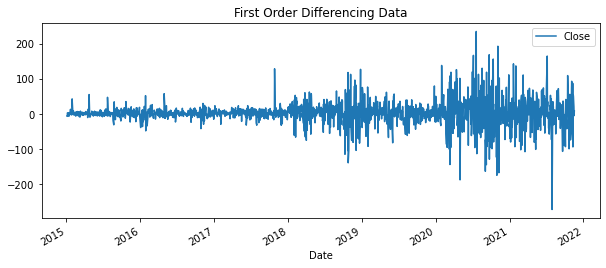

In [35]:
df_firstdiff = df_actual.diff(1).plot(figsize=(10,4),title='First Order Differencing Data')

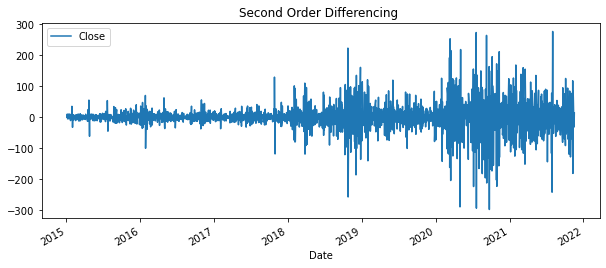

In [36]:
df_seconddiff = (df_actual.diff()).diff().plot(figsize=(10,4),title='Second Order Differencing ')

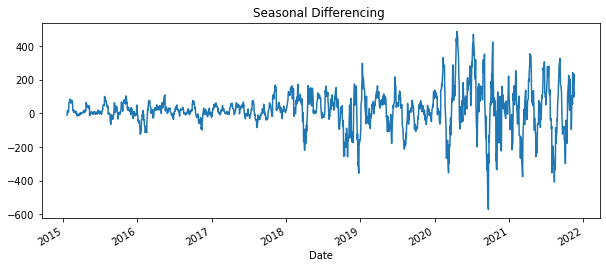

In [37]:
df_seasonaldiff = (df_actual.Close).diff(12).plot(figsize=(10,4),title='Seasonal Differencing ')

<b> STATIONARITY TESTS - AD FULLER TEST IMPLEMENTATION

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
def adf_test(time_series):
    print('Augmented Dickey-Fuller Test:')
    indices = ['Test Statistic', 'p-value','# Of Lags Used', '# Of Observations Used']
    adf_test = adfuller(time_series, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    if adf_test[1] <= 0.05:
        print("Data has unique roots, and the time series is stationary.")
    else:
        print("Data Does not have unique roots, and is non-stationary. Further transformations are required")
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value
    return results

In [40]:
adf_test(df_actual.Close)

Augmented Dickey-Fuller Test:
Data Does not have unique roots, and is non-stationary. Further transformations are required


Test Statistic               0.061095
p-value                      0.963302
# Of Lags Used               3.000000
# Of Observations Used    1729.000000
Critical Value (1%)         -3.434138
Critical Value (5%)         -2.863213
Critical Value (10%)        -2.567661
dtype: float64

In [41]:
df_testing = pd.DataFrame((df_actual.Close).diff(1))
adf_test(df_testing.Close.dropna())

Augmented Dickey-Fuller Test:
Data has unique roots, and the time series is stationary.


Test Statistic           -1.066832e+01
p-value                   4.230570e-19
# Of Lags Used            2.500000e+01
# Of Observations Used    1.706000e+03
Critical Value (1%)      -3.434189e+00
Critical Value (5%)      -2.863236e+00
Critical Value (10%)     -2.567673e+00
dtype: float64

In [42]:
df_testing_second = pd.DataFrame((df_actual.Close).diff().diff())
adf_test(df_testing_second.Close.dropna())

Augmented Dickey-Fuller Test:
Data has unique roots, and the time series is stationary.


Test Statistic           -1.312762e+01
p-value                   1.517591e-24
# Of Lags Used            2.500000e+01
# Of Observations Used    1.705000e+03
Critical Value (1%)      -3.434191e+00
Critical Value (5%)      -2.863237e+00
Critical Value (10%)     -2.567673e+00
dtype: float64

In [43]:
df_stationary= pd.DataFrame(np.log(df_actual.Close).diff().diff(12))
adf_test(df_stationary.Close.dropna())

Augmented Dickey-Fuller Test:
Data has unique roots, and the time series is stationary.


Test Statistic           -1.476653e+01
p-value                   2.357940e-27
# Of Lags Used            2.300000e+01
# Of Observations Used    1.696000e+03
Critical Value (1%)      -3.434212e+00
Critical Value (5%)      -2.863246e+00
Critical Value (10%)     -2.567678e+00
dtype: float64

<b> We consider the seasonally differenced data(df_stationary) for building our ARIMA Model as it passes the AD Fuller Test.

In [44]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [45]:
acf_values = acf(df_stationary.dropna())

In [46]:
pacf_values = pacf(df_stationary.dropna())

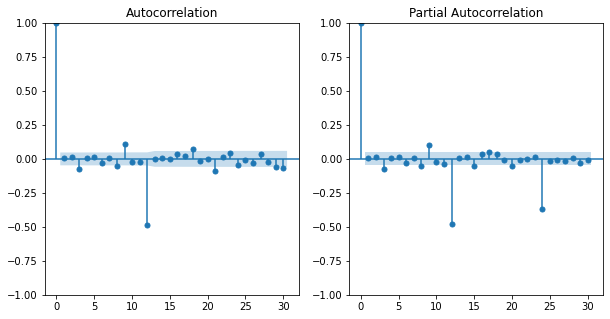

In [47]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(df_stationary.dropna(), lags=30,alpha = 0.05,ax=ax[0])
plot_pacf(df_stationary.dropna(), lags=30,alpha = 0.05,ax=ax[1])
plt.show()

In [48]:
from matplotlib import pyplot

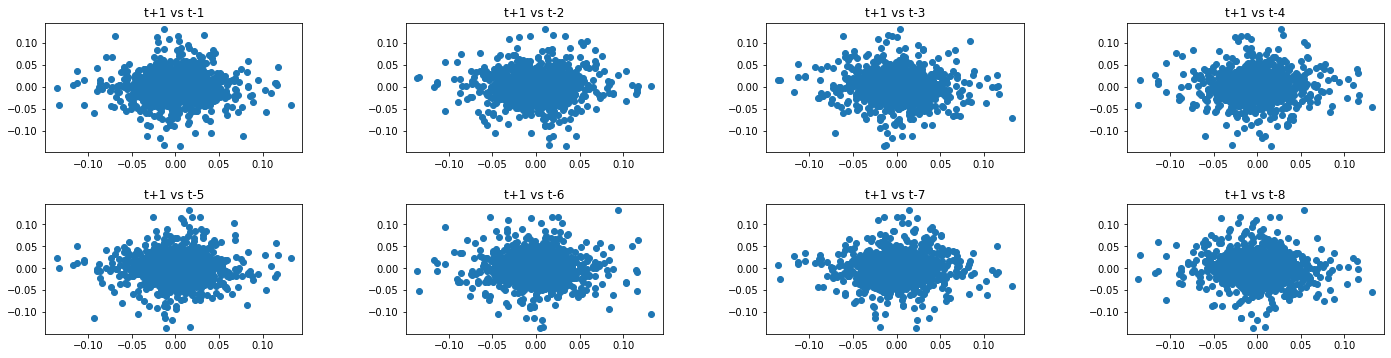

In [49]:
charts = df_stationary['Close']
lags = 8
columns = [charts]
for i in range(1,(lags + 1)):
    columns.append(charts.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1, figsize=(24,9))

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    pyplot.subplots_adjust(bottom=0.4, wspace = 0.4, hspace = 0.4)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

## BUILDING THE ARIMA MODEL

Generating 2 lagged p-term coefficients by applying a time shift operation 

In [50]:
for i in range(1,3):
    df_stationary['Lagged_value_%d' % i ] = df_stationary['Close'].shift(i)

Split the train and test data in the ratio of 70% and 30%

In [51]:
df_stationary

,Close,Lagged_value_1,Lagged_value_2
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN
...,...,...,...
2021-11-11,-0.019382,-0.022127,0.054082
2021-11-12,0.010196,-0.019382,-0.022127
2021-11-15,-0.010008,0.010196,-0.019382


In [52]:
train_size  = (int) (0.7 * df_stationary.shape[0])             #Splitting the train and testing data into 70% and 30%
test_size   = (int) (0.3 * df_stationary.shape[0])
total_size  = (int) (df_stationary.shape[0])

In [53]:
train = pd.DataFrame(df_stationary[0:train_size])              #Converting the train and test data to panda dataframes.
test = pd.DataFrame(df_stationary[train_size:total_size])

In [54]:
train_na = train.bfill()                                       #Filling 'na' values with bfill() to avoid null values.

In [55]:
X_training  = train_na.iloc[:,1:].values.reshape(-1,2)         #Reshaping the X and Y columns after shifting to attain model paramters 
y_training  = train_na.iloc[:,0].values.reshape(-1,1)
X_test = test.iloc[:,1:].values.reshape(-1,2)

<b>Fit the training and test data to Linear Regression

In [56]:
model = LinearRegression()                                         #Fitting the LR Model to generate coeffiecients
model.fit(X_training,y_training)

LinearRegression()

In [57]:
theta  = model.coef_.T
intercept = model.intercept_

In [58]:
train_na['Predicted_Values'] = X_training.dot(theta) + intercept    #Populating the Linear Regression Equation
test['Predicted_Values'] = X_test.dot(theta) + intercept

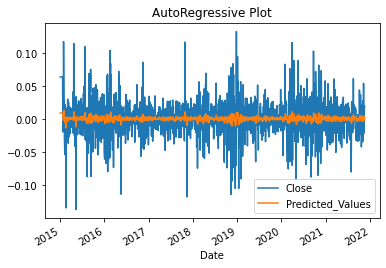

In [59]:
df_combined = pd.concat([train_na,test])                            #Plotting the Actual and Predicted Values
df_combined[['Close','Predicted_Values']].plot(title=('AutoRegressive Plot'));

<b>Calculating Error Lags from above data

In [60]:
Lag = pd.DataFrame()
Lag['Error_Lags'] = df_combined.Close - df_combined.Predicted_Values

<b> Calculating Lagged Error for MA Model 

In [61]:
for i in range(1,2):                                               # Generating error Lags for order MA(1)
    Lag['Lagged_error_value_%d' % i ] = Lag['Error_Lags'].shift(i)

In [62]:
Lag_train_size = (int)(0.7 * Lag.shape[0])                         #Splitting the train and testing data into 70% and 30%
Lag_test_size  = (int)(0.3 * Lag.shape[0])
Lag_total_size = (int)(Lag.shape[0])

In [63]:
Lag_train = pd.DataFrame(Lag[0:Lag_train_size])                    #Converting the train and test data to panda dataframes.
Lag_test = pd.DataFrame(Lag[Lag_train_size:Lag_total_size])

In [64]:
Lag_train_na = Lag_train.bfill()                                       #Filling 'na' values with bfill() to avoid null values.
Lag_X_training = Lag_train_na.iloc[:,1:].values.reshape(-1,1)           #Reshaping the X and Y columns after shifting to attain model paramters
Lag_y_training = Lag_train_na.iloc[:,0].values.reshape(-1,1)
Lag_X_test = Lag_test.iloc[:,1:].values.reshape(-1,1)

In [65]:
lr = LinearRegression()                          #Fitting Linear Regression to find the Lagged Error Coefficients
lr.fit(Lag_X_training,Lag_y_training)

LinearRegression()

In [66]:
theta= lr.coef_.T                               
intercept = lr.intercept_

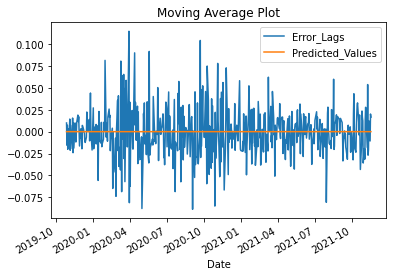

In [67]:
Lag_train_na['Predicted_Values'] = Lag_X_training.dot(lr.coef_.T) + lr.intercept_     #Plotting the Error Lags and predicted Values
Lag_test['Predicted_Values'] = Lag_X_test.dot(lr.coef_.T) +lr.intercept_
Lag_test[['Error_Lags','Predicted_Values']].plot(title='Moving Average Plot');

In [68]:
RMSE = np.sqrt(mean_squared_error(Lag_test['Error_Lags'], Lag_test['Predicted_Values']))
RMSE

0.027500691484114614

In [69]:
Lag_c = pd.concat([Lag_train,Lag_test])
Lag_c

,Error_Lags,Lagged_error_value_1,Predicted_Values
Date,,,
2015-01-02,0.054631,NaN,NaN
2015-01-05,0.054631,0.054631,NaN
2015-01-06,0.054631,0.054631,NaN
2015-01-07,0.054631,0.054631,NaN
2015-01-08,0.054631,0.054631,NaN
...,...,...,...
2021-11-11,-0.020478,-0.026890,-1.263326e-06
2021-11-12,0.012281,-0.020478,-9.627822e-07
2021-11-15,-0.010664,0.012281,5.725648e-07


<b> Shifting the data to their original scales by reversing the seasonal differencing

In [70]:
df_combined.Close += np.log(df).shift(1).Close              #Using shift operations reversing the differencing for Actual Values
df_combined.Close += np.log(df).diff().shift(12).Close
df_combined.Close  = np.exp(df_combined.Close)

In [71]:
df_combined.Predicted_Values += np.log(df).shift(1).Close    #Using shift operations reversing the differencing for Actual Values
df_combined.Predicted_Values += np.log(df).diff().shift(12).Close
df_combined.Predicted_Values = np.exp(df_combined.Predicted_Values)

In [72]:
Actual_values = df_combined['Close'].to_numpy()              #Converted to numpy for better plotting
Predicted_values = df_combined['Predicted_Values'].to_numpy()

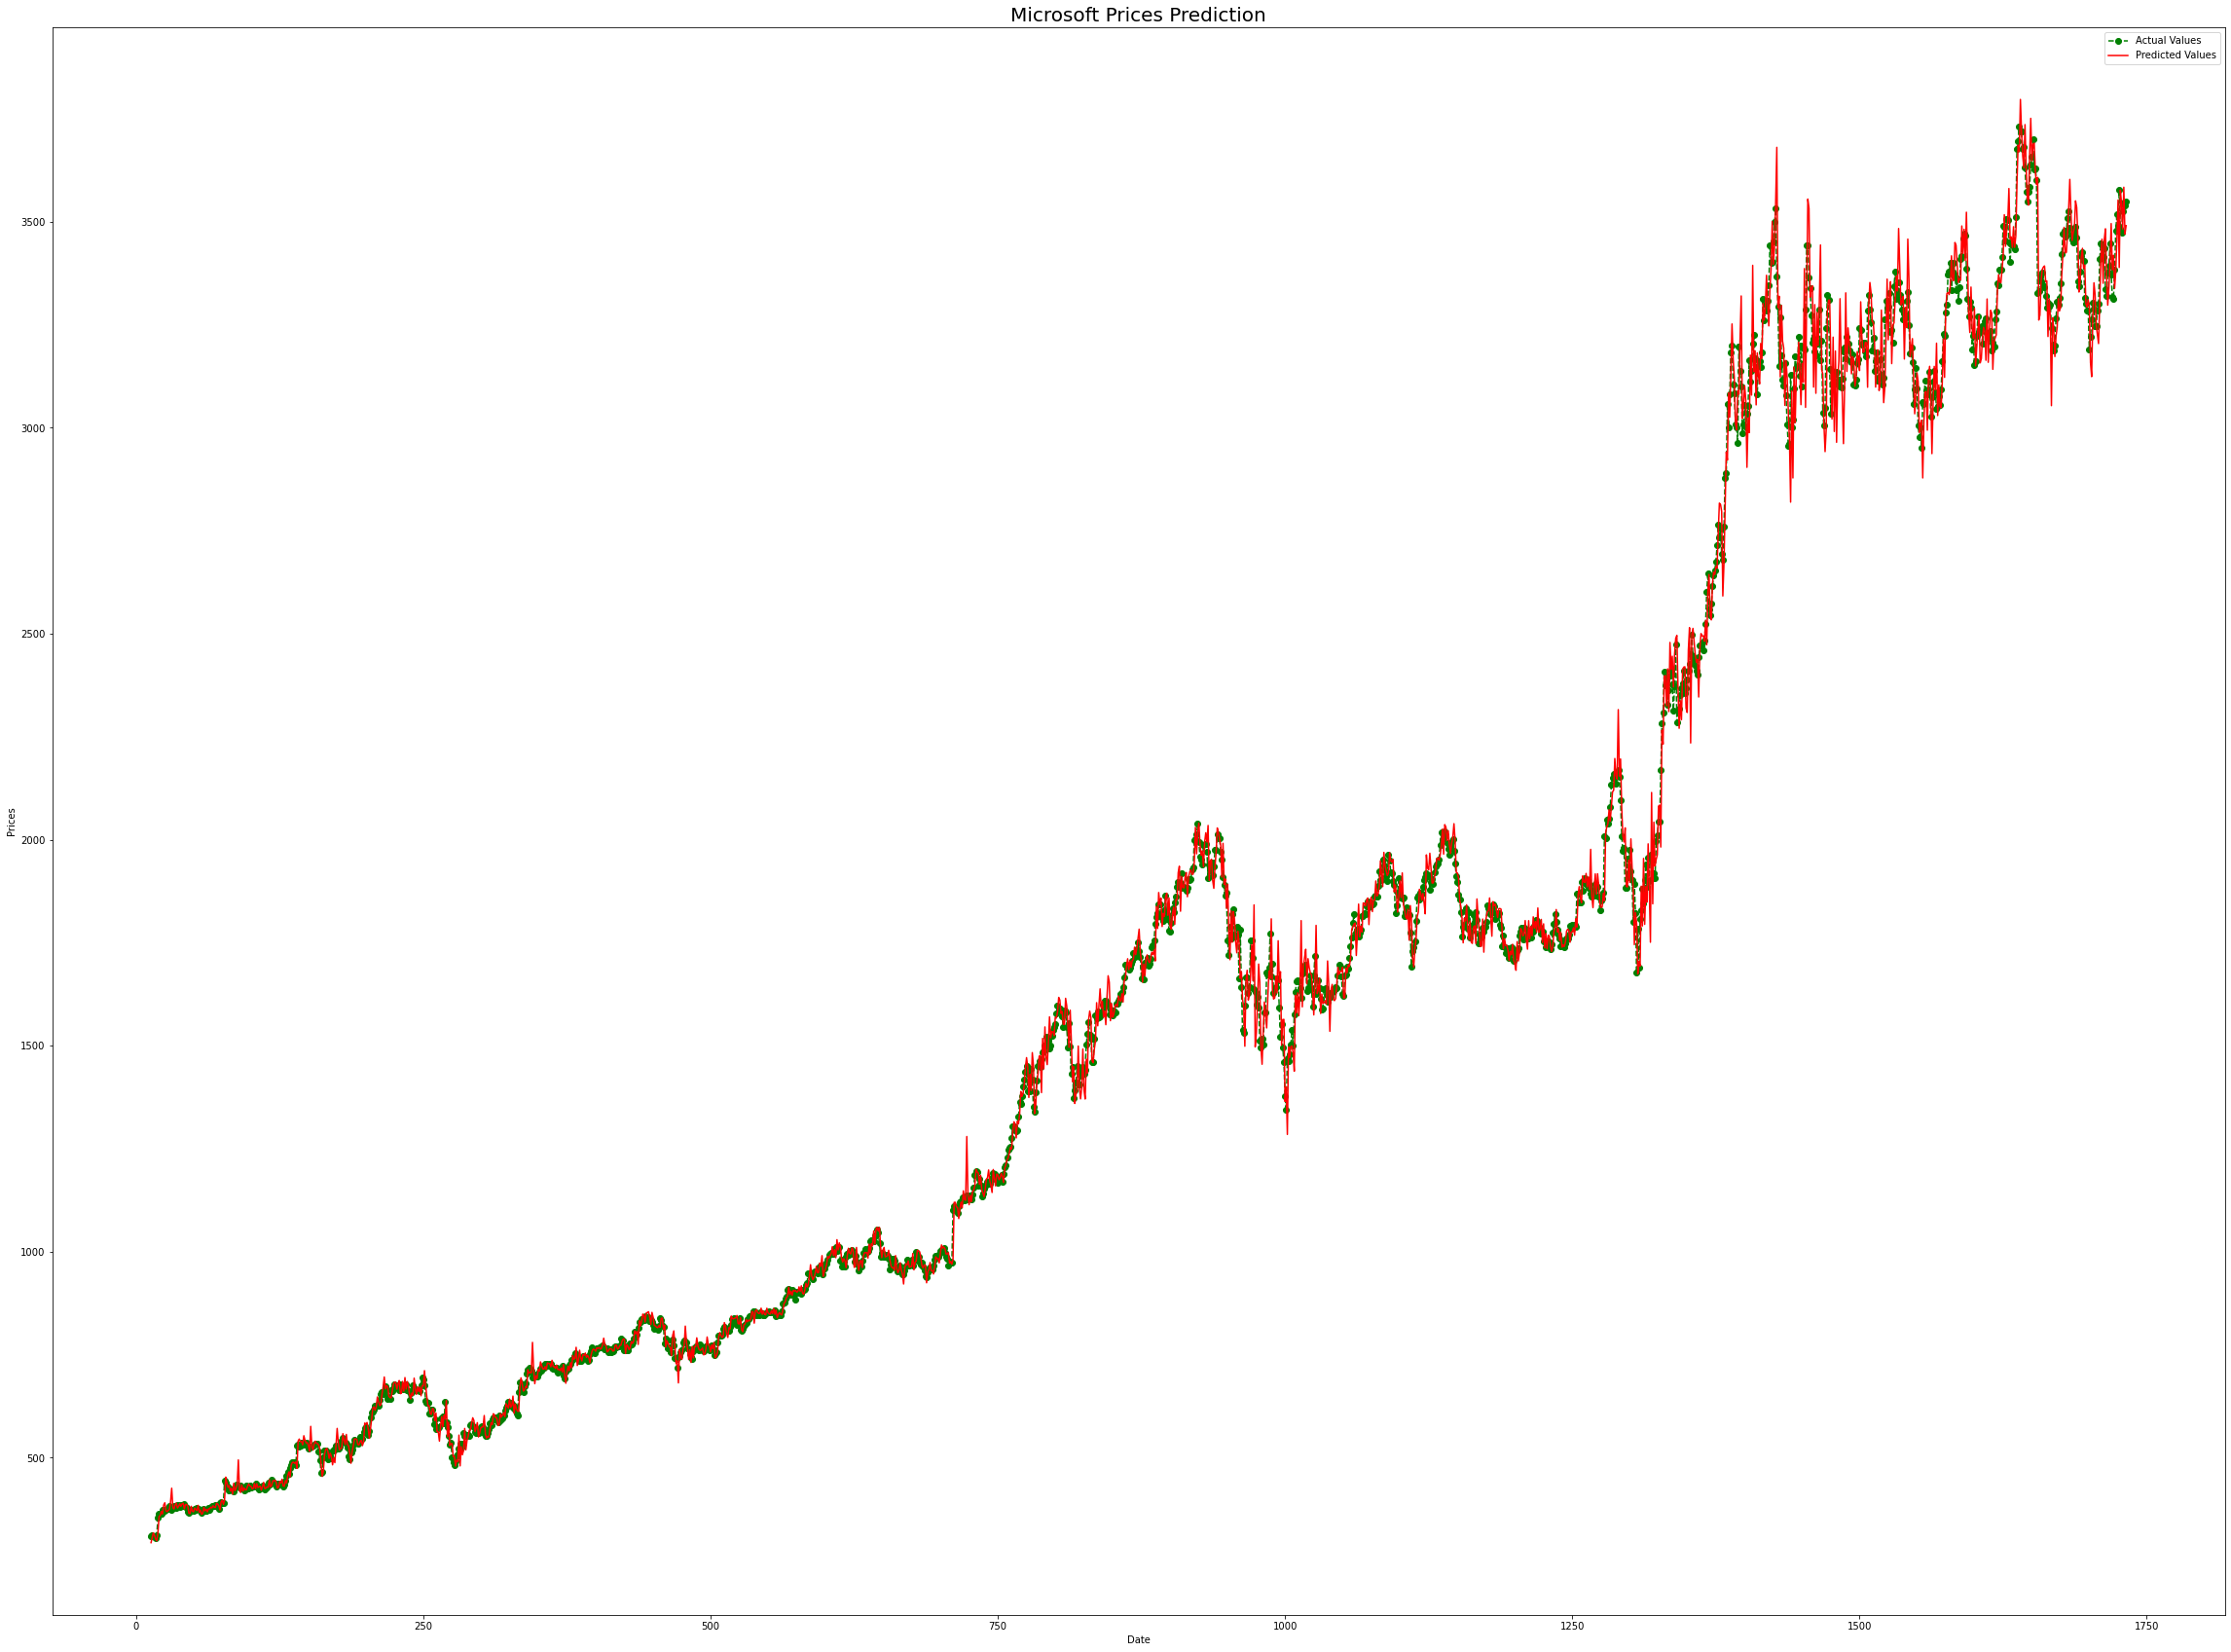

In [73]:
plt.figure(figsize=(40,30))
plt.plot(Actual_values, color='green', marker='o', linestyle='dashed',label='Actual Values')
plt.plot(Predicted_values, color='red',label='Predicted Values')
plt.title('Microsoft Prices Prediction',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [74]:
from sklearn import metrics

In [75]:
def evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [76]:
evaluation_metrics_func(df_combined['Close'].dropna(),df_combined['Predicted_Values'].dropna())

Evaluation metric results:-
MSE is : 2524.886414297173
MAE is : 31.495240603697464
RMSE is : 50.2482478729077
MAPE is : 1.9063527295960594
R2 is : 0.9973935589823592



SEASONAL DECOMPOSITION

In [77]:
df_actual

,Close
Date,
2015-01-02,308.519989
2015-01-05,302.190002
2015-01-06,295.290009
2015-01-07,298.420013
2015-01-08,300.459991
...,...
2021-11-11,3472.500000
2021-11-12,3525.149902
2021-11-15,3545.679932


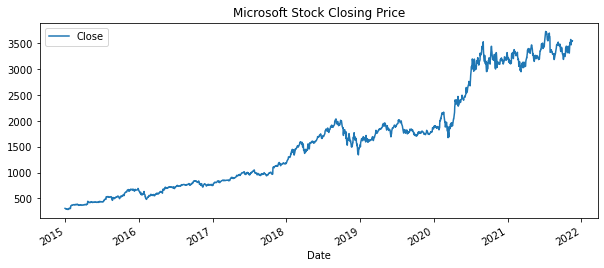

In [78]:
df_actual.plot(figsize=(10,4),title=('Microsoft Stock Closing Price'));

In [79]:
from statsmodels.tsa.filters.hp_filter import hpfilter
stock_cycle,stock_trend = hpfilter(df_actual['Close'], lamb=1600)

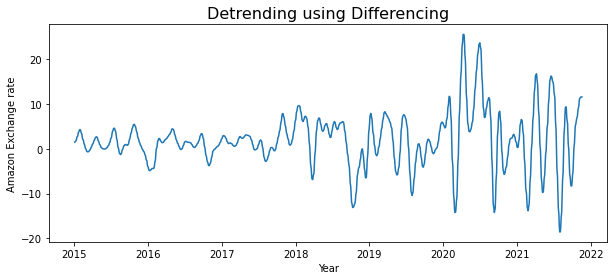

In [80]:
diff = stock_trend.diff()
plt.figure(figsize=(10,4))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Amazon Exchange rate')
plt.show()

In [81]:
from scipy import signal

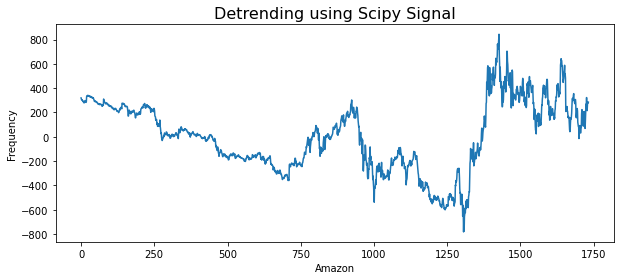

In [82]:
detrended = signal.detrend(df_actual['Close'].values)
plt.figure(figsize=(10,4))
plt.plot(detrended)
plt.xlabel('Amazon')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

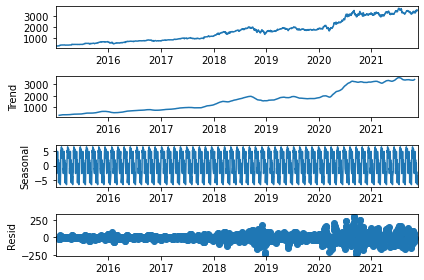

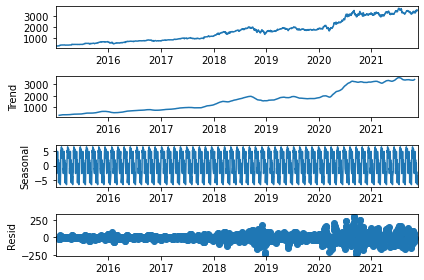

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
trend = seasonal_decompose(df_actual, model='additive',period = 30)
trend.plot()

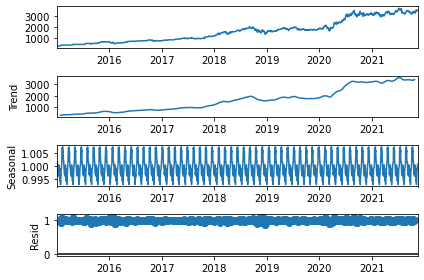

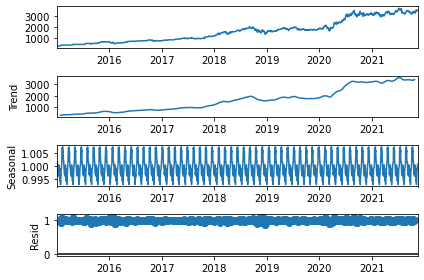

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
trend = seasonal_decompose(df_actual, model='mul',period = 30)
trend.plot()

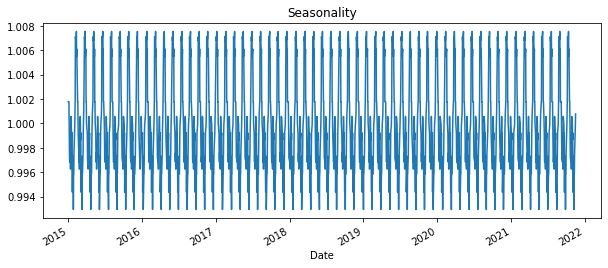

In [85]:
trend.seasonal.plot(figsize=(10,4),title='Seasonality');

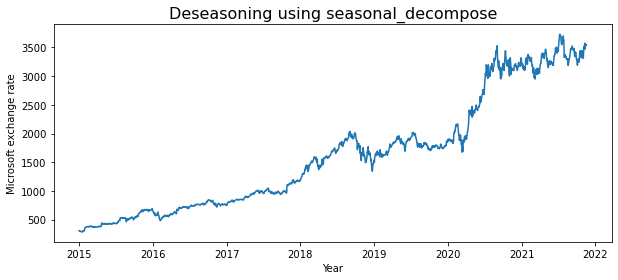

In [86]:
deseasonal = df_actual['Close'] - trend.seasonal
plt.figure(figsize=(10,4))
plt.plot(deseasonal)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Microsoft exchange rate')
plt.show()

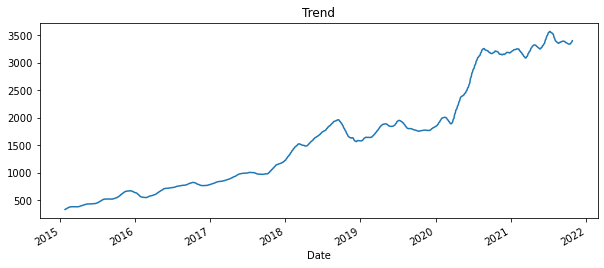

In [87]:
trend.trend.plot(figsize=(10,4),title='Trend');

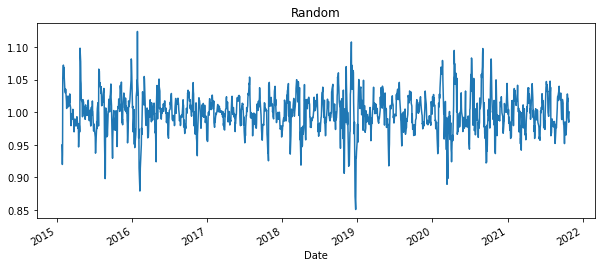

In [88]:
trend.resid.plot(figsize=(10,4),title='Random');

In [89]:
from statsmodels.tsa.filters.hp_filter import hpfilter
stock_cycle,stock_trend = hpfilter(df_actual['Close'], lamb=1600)

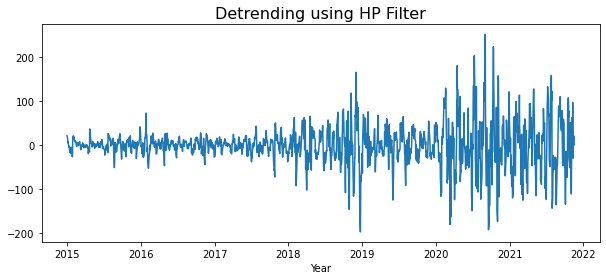

In [90]:
detrended = df_actual['Close'] - stock_trend
plt.figure(figsize=(10,4))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.show()

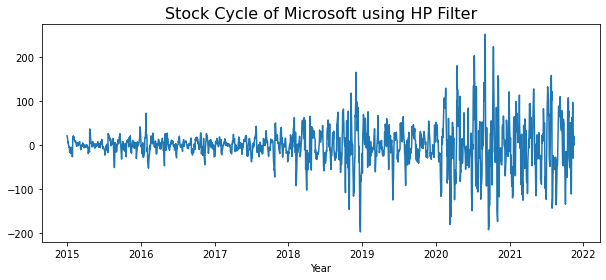

In [91]:
stock_deseasonal = df_actual['Close'] - stock_cycle
plt.figure(figsize=(10,4))
plt.plot(stock_cycle)
plt.title('Stock Cycle of Microsoft using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.show()